In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv("Appendix 2 EN Steels.csv")
df.head()

,Sl. No.,C,Si,Mn,P,Ni,Cr,Mo,Mn/S,CR,TT,YS,UTS,EL,RA,IS
0,1,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,38,580,934,1019,18.0,54.0,35
1,2,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,16,620,736,845,22.0,59.0,42
2,3,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,16,605,785,888,21.0,60.0,72
3,4,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,7,625,693,824,21.5,57.0,43
4,5,0.35,0.19,1.50,0.026,0.93,0.57,0.18,75,7,650,681,839,21.5,58.0,89


<AxesSubplot:>

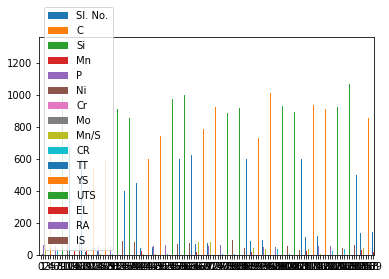

In [3]:
# bar graph for whole dataset
df.plot.bar(rot=0)

In [4]:
#create a dataframe with all training data except the target column
train_X = df[['C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S', 'CR', 'TT']]

#check that the target variable has been removed
train_X.head()

,C,Si,Mn,P,Ni,Cr,Mo,Mn/S,CR,TT
0,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,38,580
1,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,16,620
2,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,16,605
3,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,7,625
4,0.35,0.19,1.50,0.026,0.93,0.57,0.18,75,7,650


<AxesSubplot:>

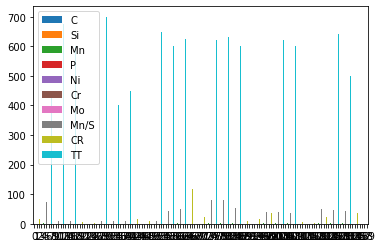

In [5]:
# bar graph for whole dataset
train_X.plot.bar(rot=0)

In [6]:
#create a dataframe with all training data except the target column
train_Y = df[['YS', 'UTS', 'EL', 'RA', 'IS']]
#check that the target variable has been removed
train_Y.head()

,YS,UTS,EL,RA,IS
0,934,1019,18.0,54.0,35
1,736,845,22.0,59.0,42
2,785,888,21.0,60.0,72
3,693,824,21.5,57.0,43
4,681,839,21.5,58.0,89


<AxesSubplot:>

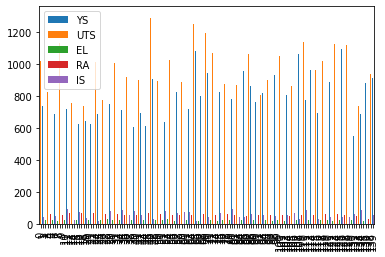

In [7]:
# bar graph
train_Y.plot.bar()

In [9]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.barplot(x="train_X", y="train_Y", data=tips)

In [10]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [11]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
model.fit(train_X, train_Y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
4/4 [==============================] - 0s 45ms/step - loss: 172872.2656 - val_loss: 194890.6094
Epoch 2/30
4/4 [==============================] - 0s 28ms/step - loss: 172834.7188 - val_loss: 194831.0781
Epoch 3/30
4/4 [==============================] - 0s 30ms/step - loss: 172769.6406 - val_loss: 194757.6562
Epoch 4/30
4/4 [==============================] - 0s 28ms/step - loss: 172717.0781 - val_loss: 194710.4219
Epoch 5/30
4/4 [==============================] - 0s 41ms/step - loss: 172667.8906 - val_loss: 194690.2344
Epoch 6/30
4/4 [==============================] - 0s 31ms/step - loss: 172630.3594 - val_loss: 194660.7188
Epoch 7/30
4/4 [==============================] - 0s 22ms/step - loss: 172592.4219 - val_loss: 194616.2656
Epoch 8/30
4/4 [==============================] - 0s 20ms/step - loss: 172553.5938 - val_loss: 194627.1562
Epoch 9/30
4/4 [==============================] - 0s 20ms/step - loss: 172506.6719 - val_loss: 194601.8750
Epoch 10/30
4/4 [====================